In [1]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 40 kB 6.3 MB/s 
     |████████████████████████████████| 180 kB 62.5 MB/s 
     |████████████████████████████████| 145 kB 68.7 MB/s 
     |████████████████████████████████| 217 kB 50.4 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 
     |████████████████████████████████| 85 kB 4.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [2]:
#this is the same code we used for a CNN predicting a number based on a handmade drawing of it
#for this, i forked another repository: https://github.com/JosePabloGFnl/exportacion-numeros

import tensorflow as tf
import tensorflow_datasets as tfds

#MNIST data set
datos, metadatos = tfds.load('emnist', as_supervised=True, with_info=True)

datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

nombres_clases = metadatos.features['label'].names

#normalizing function, makes it faster
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #0-255 to 0-1
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/697932 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/emnist/byclass/3.0.0.incompleteAHFBZN/emnist-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/116323 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/emnist/byclass/3.0.0.incompleteAHFBZN/emnist-test.tfrecord*...:   0%|         …

Dataset emnist downloaded and prepared to ~/tensorflow_datasets/emnist/byclass/3.0.0. Subsequent calls will reuse this data.


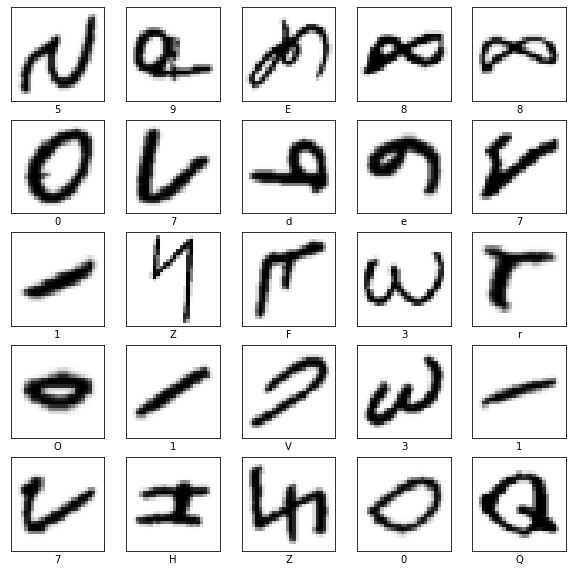

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])
plt.show()

In [4]:
#creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                kernel_size=(5, 5),
                strides=(2, 2),
                input_shape=(28, 28, 1),
                activation='relu'))
model.add(tf.keras.layers.Conv2D(64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(65, activation=tf.nn.softmax))

#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

TAMANO_LOTE = 1024

#shuffling
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

import math

#training
historial = model.fit(datos_entrenamiento, epochs=50, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/50
682/682 [==============================] - 80s 16ms/step - loss: 0.8717 - accuracy: 0.7404
Epoch 2/50
682/682 [==============================] - 11s 16ms/step - loss: 0.5061 - accuracy: 0.8279
Epoch 3/50
682/682 [==============================] - 11s 16ms/step - loss: 0.4602 - accuracy: 0.8398
Epoch 4/50
682/682 [==============================] - 11s 17ms/step - loss: 0.4410 - accuracy: 0.8448
Epoch 5/50
682/682 [==============================] - 11s 16ms/step - loss: 0.4261 - accuracy: 0.8489
Epoch 6/50
682/682 [==============================] - 11s 16ms/step - loss: 0.4126 - accuracy: 0.8523
Epoch 7/50
682/682 [==============================] - 11s 16ms/step - loss: 0.4063 - accuracy: 0.8538
Epoch 8/50
682/682 [==============================] - 11s 16ms/step - loss: 0.4036 - accuracy: 0.8551
Epoch 9/50
682/682 [==============================] - 11s 16ms/step - loss: 0.3957 - accuracy: 0.8563
Epoch 10/50
682/682 [==============================] - 11s 16ms/step - loss: 0.391

In [5]:
#exporting the model to h5
model.save('numeros.h5')

In [6]:
!ls

'~'   numeros.h5   sample_data


In [7]:
!pip install tensorflow js

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 47.7 MB/s 
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2907 sha256=d76ed4ba079a6a762b3bb8db9b08f227a4d447b5af67aadeb9df01c15d20c3de
  Stored in directory: /root/.cache/pip/wheels/bf/92/56/6597c8f32980ee64af7e864796e8d7423eb67eafff5415a4ae
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=c94bf23d4f417052e1e1f30b8e09e72428e761dd8be9f9dc924991793e4f2f31
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
Successfully built js shutilwhich


In [8]:
#folder with output files
!mkdir carpeta_salida

In [9]:
#export to output folder
!tensorflowjs_converter --input_format keras numeros.h5 carpeta_salida

In [10]:
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [11]:
#note, if tensorflow does not work in the page, do the following:
#open cmd > cd [folder] > python -m http.server 8000
#in the address, localhost:8000/index.html